In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


Bad key text.latex.preview in file C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\lavanya\anaconda3\envs\aiml\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the de

In [2]:
data=pd.read_csv("Preprocessed_housedata.csv")
data

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
12705,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
12706,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
12707,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
12708,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [3]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [4]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [5]:
data['BHK']=data['size'].apply(lambda x: int(x.split(' ')[0]))


In [6]:
data.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [7]:
data['BHK'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [8]:
data[data.BHK>20]

,location,size,total_sqft,bath,balcony,price,BHK
1634,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4445,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [9]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [10]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [11]:
data[~data['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,balcony,price,BHK
27,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
114,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
129,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
153,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
176,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
392,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
524,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
629,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
639,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
735,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [12]:
def convert_sqft_tonum(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [13]:
data=data.copy()
data['total_sqft']=data['total_sqft'].apply(convert_sqft_tonum)

In [14]:
data.head(10)

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
6,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
7,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3
8,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
9,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2


In [15]:
data.loc[30]

location      Raja Rajeshwari Nagar
size                          3 BHK
total_sqft                   1693.0
bath                            3.0
balcony                         3.0
price                         57.39
BHK                               3
Name: 30, dtype: object

In [16]:
data1=data.copy()
data1['price_per_sqft']=data1['price']*1000000/data1['total_sqft']
data1.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,42500.000000


In [17]:
len(data1.location.unique())

1265

In [18]:
data1.location=data1.location.apply(lambda x: x.strip())
location_stats=data1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [19]:
len(location_stats[location_stats<=10])

1017

In [20]:
locationlessthan10=location_stats[location_stats<=10]
locationlessthan10

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [21]:
len(data1.location.unique())

1254

In [22]:
data1.head(10)

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,42500.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,32478.632479
6,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,48282.442748
7,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,38888.888889
8,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,105924.596050
9,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,38000.000000


In [23]:
data1[data1.total_sqft/data1.BHK<300].head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
51,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,106609.808102
61,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,62962.962963
63,Double Road,3 Bedroom,500.0,3.0,2.0,100.0,3,200000.000000
71,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,47826.086957
81,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,225352.112676


In [24]:
data2=data1[~(data1.total_sqft/data1.BHK<300)]
data2.head(10)

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,42500.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,32478.632479
6,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,48282.442748
7,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,38888.888889
8,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,105924.596050
9,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,38000.000000


In [25]:
data2.shape

(12055, 8)

# Removing Outliers

In [26]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

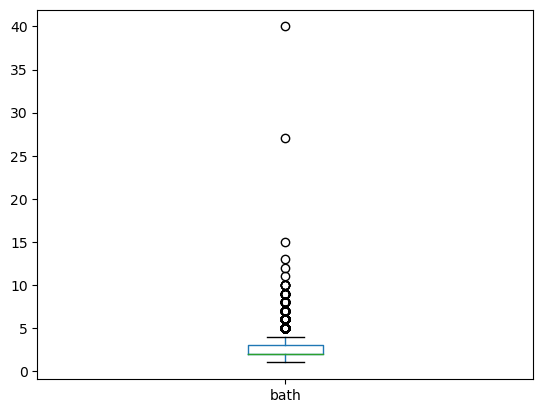

In [27]:
plot_boxplot(data,'bath')

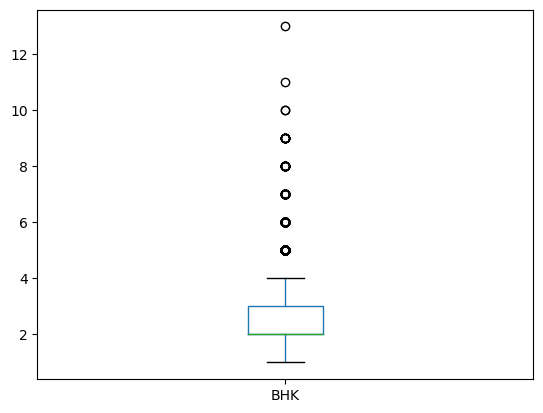

In [28]:
plot_boxplot(data2,'BHK')

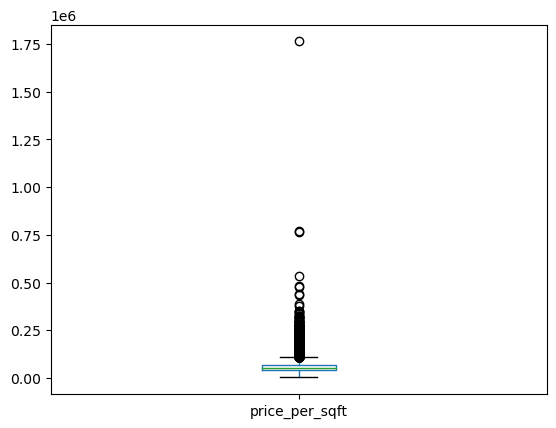

In [29]:
plot_boxplot(data2,'price_per_sqft')

In [30]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.35)
    Q3=df[ft].quantile(0.65)
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    ls=df.index[(df[ft]<lower_bound)|(df[ft]>upper_bound)]
    
    return ls

In [31]:
#create an empty list to store the output indices from multiple columns

index_list=[]
for feature in['total_sqft','bath','balcony','price_per_sqft','BHK']:
    index_list.extend(outliers(data2,feature))
    
   

In [32]:
# Convert the index list to a set to remove duplicate indices
index_set = set(index_list)

# Remove rows with outlier indices from the dataset
df_cleaned = data2.drop(index=index_set)

# Now you can access the shape of df_cleaned
print(df_cleaned.shape)

(8611, 8)


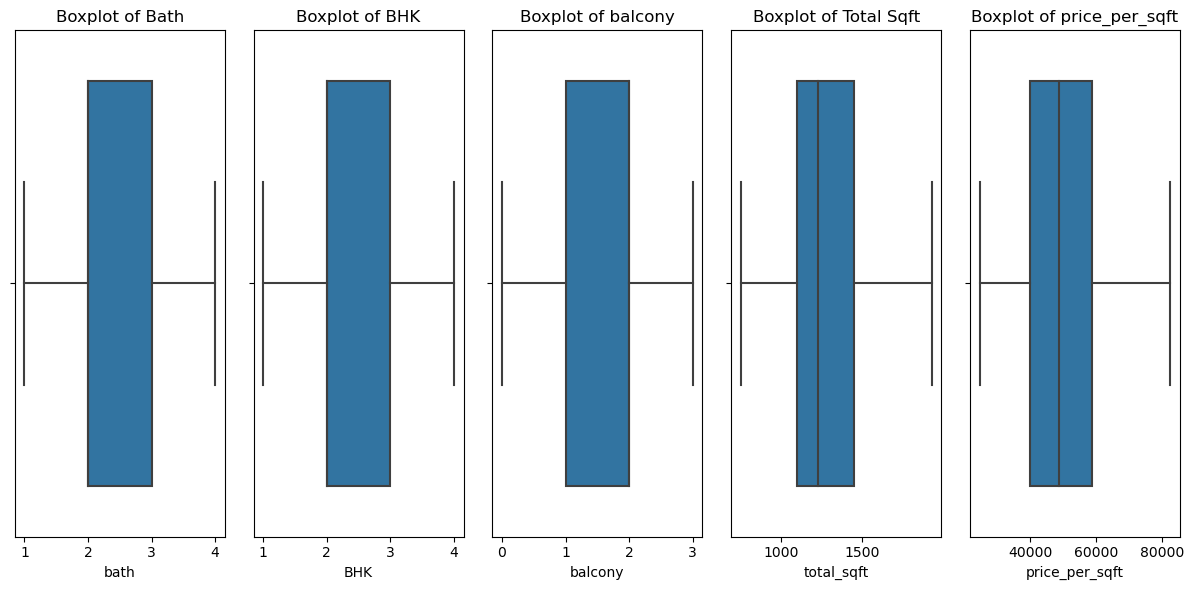

In [33]:
# Plot multiple box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 5, 1)
sns.boxplot(x='bath', data=df_cleaned)
plt.title('Boxplot of Bath')

plt.subplot(1, 5, 2)
sns.boxplot(x='BHK', data=df_cleaned)
plt.title('Boxplot of BHK')
plt.subplot(1, 5, 3)
sns.boxplot(x='balcony', data=df_cleaned)
plt.title('Boxplot of balcony')

plt.subplot(1, 5, 4)
sns.boxplot(x='total_sqft', data=df_cleaned)
plt.title('Boxplot of Total Sqft')



plt.subplot(1, 5, 5)
sns.boxplot(x='price_per_sqft', data=df_cleaned)
plt.title('Boxplot of price_per_sqft')


plt.tight_layout()
plt.show()

In [34]:
# Save cleaned data to CSV
df_cleaned.to_csv('cleaned_data.csv', index=False)


In [35]:
df_cleaned=pd.read_csv('cleaned_data.csv')
df_cleaned.isnull().sum()

location           0
size               0
total_sqft        35
bath               0
balcony            0
price              0
BHK                0
price_per_sqft    35
dtype: int64

In [36]:
numerical_columns = ['total_sqft', 'bath', 'balcony', 'price', 'BHK', 'price_per_sqft']

# Mean imputation for numerical columns
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].fillna(df_cleaned[numerical_columns].mean())

In [37]:
categorical_columns = ['location', 'size']

# Mode imputation for categorical columns
for column in categorical_columns:
    df_cleaned[column] = df_cleaned[column].fillna(df_cleaned[column].mode()[0])

In [38]:
df_cleaned.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
BHK               0
price_per_sqft    0
dtype: int64

In [40]:
# Save cleaned data to CSV
df_cleaned.to_csv('cleaned_data_house_price.csv', index=False)
